<a href="https://colab.research.google.com/github/Nagasai122/Covid_sentiment_analysis/blob/main/Netflix_movie_suggestion_UnsuvervisedML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Netflix Movies and TV shows Clustering

##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Member 1 -** Dasari Naga Sai

# **Project Summary -**

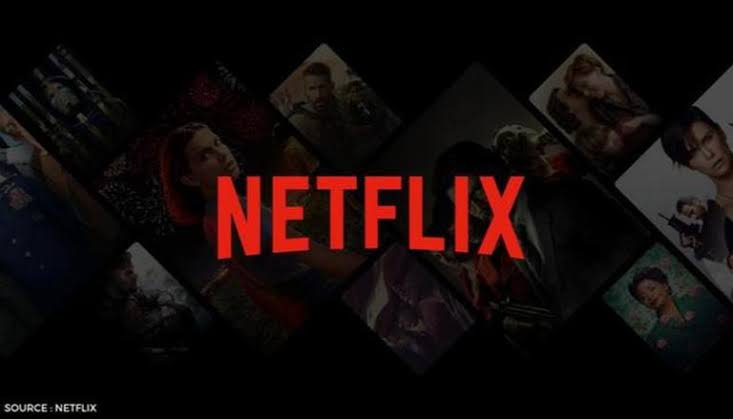

Netflix, the world’s largest on-demand internet streaming media and online DVD movie rental service provider.it Founded August 29, 1997, in Los Gatos, California by Marc and Reed. It has 69 million members in over 60 countries enjoying more than 100 million hours of TV shows and movies per day Netflix is the world’s leading internet entertainment service with enjoying TV series, documentaries, and feature films across a wide variety of genres and languages. I was curious to analyze the content released in Netflix platform which led me to create these simple, interactive, and exciting visualizations and find similar groups of people.

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Fixable which is a third-party Netflix search engine. In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset. Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

In this project, we worked on a text clustering problem where we had to classify/group the Netflix movie/shows into certain clusters such that the shows within a cluster are similar to each other and the shows in different clusters are dissimilar to each other.

* The dataset contained about 7787 records, and 11 attributes.

* In the initial phase, we have focused more on the data cleaning and analyzed data in various categories and then we did exploratory data analysis (EDA).

* We Created cluster using following attributes like director, cast, country, genre, rating and description. These attributes were tokenized, preprocessed, and then vectorized using TFIDF vectorizer.

* We used Principal Component Analysis (PCA) to handle the curse of dimensionality.

* We built Two types of clusters using the K-Means Clustering and Agglomerative Heirachycal clustering algorithm and find out optimal number of clusters using diffrent technique such as elbow method, silhoutte score and dendogram etc.

* A content based recommender system was built using the similarity matrix obtained after using cosine similarity. This recommender system will make 10 recommendations to the user based on the type of show they watched.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.**

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid")
import plotly.express as px

from datetime import datetime

# Word Cloud library
from wordcloud import WordCloud, STOPWORDS

# library used for textual data prerocessing
import string,unicodedata
string.punctuation
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

# library used for building recommandation system
from sklearn.metrics.pairwise import cosine_similarity

# library used for Clusters impelementation
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc


import warnings
warnings.filterwarnings('ignore')




### Dataset Loading

In [ ]:
# Load Dataset
df = pd.read_csv('https://raw.githubusercontent.com/Nagasai122/Netflix_movie_recommedations/main/NETFLIX%20MOVIES%20AND%20TV%20SHOWS%20CLUSTERING.csv')

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

### Dataset Information

In [ ]:
# Dataset Info
df.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isna().sum()

In [ ]:
# missing value percentage
columnwise_percent_missing_values = round((df.isna().sum())/len(df)*100,2).sort_values(ascending=False)
columnwise_percent_missing_values

In [ ]:
# Visualizing the missing values

plt.figure(figsize=(12,6))
plt.title("Percentage of Missing Values per Column",fontsize=15)
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='Greens')
plt.xlabel('Column name')
plt.ylabel('% missing values')
plt.xticks(rotation=90)
plt.show()

### What did you know about your dataset?

**NaN values are present in the following columns:**

*   director
*   cast
*   country
*   date_added
*   rating

Since data set provided of small size, we can't drop null values. So we will impute NaN values with mode.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

In [ ]:
# Dataset Describe
df.describe(include='all').transpose()

### Variables Description 


*   **show_id**      : Unique ID for every Movie/Show
*   **type**         : Identifier - Movie/Show
*   **title**        : Title of the Movie/Show
*   **director**     : Director of the Movie/Show
*   **cast**         : Actors involved in the Movie/Show
*   **country**      : Country where the Movie/Show was produced
*   **date_added**   : Date it was added on Netflix
*   **release_year** : Actual Release year of the Movie/Show
*   **rating**       : TV Rating of the Movie/Show
*   **duration**     : Total Duration - in minutes or number of seasons
*   **listed_in**    : Genre
*   **description**  : The Summary description





### Check Unique Values for each variable

In [ ]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique())

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
df['date_added']= pd.to_datetime(df['date_added'])
df.head()

In [ ]:
df["added_year"] = df["date_added"].dt.year
df["added_day_num"] = df["date_added"].dt.day
df["added_day"] = df["date_added"].dt.day_name()
df["added_month"] = df["date_added"].dt.month_name()
df

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code
print(df.type.value_counts())
print('-'*150)
plt.figure(figsize=(10,8))
plt.title('Percentage of Netflix Content type (Movies or TV Shows)')
g = plt.pie(df.type.value_counts(),explode=(0.025,0.025), labels=df.type.value_counts().index, colors=['tomato','skyblue'], autopct= '%1.1f%%', startangle=180)
plt.show()

In [ ]:
Monthwise_addition = df['added_month'].value_counts()
print(Monthwise_addition)
print('-'*150)

plt.figure(figsize=(16,8))
plt.title('Monthwise Content Added', fontsize=15)
Monthwise_addition.plot(kind='bar',color='skyblue')
plt.xlabel('Month')
plt.ylabel('Count')

In [ ]:
# Day wise Content addition

daywise_addition = df['added_day'].value_counts()
print(daywise_addition)
print('-'*150)

plt.figure(figsize=(16,8))
plt.title('Daywise Content Added', fontsize=15)
daywise_addition.plot(kind='bar',color='steelblue')
plt.xlabel('Day')
plt.ylabel('Count')


* Most of the content was released on Friday followed by Thursday

In [ ]:
# count the number of occurences for each genre in the data set

counts = dict()
for i in df.index:
   for g in df.loc[i,'listed_in'].split(','):
      if g.strip() not in counts:
         counts[g.strip()] = 1
      else:
         counts[g.strip()] = counts[g.strip()] + 1

In [ ]:
s= pd.DataFrame.from_dict(counts,orient='index',columns=['count'])
s =s['count'].sort_values(ascending=False)
top20_genres = s[:
                 20]
print(top20_genres)


In [ ]:
filtered_genres = df.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
plt.figure(figsize=(16,8))
g = sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:20])
plt.title('Top 20 Genres on Netflix',fontsize=15)
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

The International movie is the most popular genre followed by dramas and comedies.

In [ ]:
df['cast']= df['cast'].fillna('Unknown')

In [ ]:
# count the number of occurences for each director in the data set

cast_counts = dict()
for i in df.index:
   for g in df.loc[i,'cast'].split(','):
      if g.strip() not in cast_counts:
         cast_counts[g.strip()] = 1
      else:
         cast_counts[g.strip()] = cast_counts[g.strip()] + 1

In [ ]:
cast= pd.DataFrame.from_dict(cast_counts,orient='index',columns=['count'])
cast =cast['count'].sort_values(ascending=False)
top30_actress = cast[1:31]
print(top30_actress)

print('-'*150)


# create a bar chart
plt.figure(figsize=(20,8))
top30_actress.plot(kind='bar',color='olivedrab')
plt.xticks(rotation=90)
plt.title('Top 30 Actor/Actress with most films', fontsize=15)
plt.xlabel('Cast')
plt.ylabel('Counts')

In [ ]:
## Checking ou
df[df['cast'].str.contains('Anupam Kher')].shape

In [ ]:
df.head()

In [ ]:
# Dividing the dataset in to two catogeries : Movies and TV Show
movie_df = df[df['type'] == 'Movie']
tv_df = df[df['type'] == 'TV Show']

In [ ]:
# MOVIE RATINGS 

plt.figure(figsize=(16,8))
sns.countplot(x="rating", data= movie_df, palette="Set2", order=movie_df['rating'].value_counts().index[0:15])

* The largest count of movies are made with the 'TV-MA' rating."TV-MA" is a rating assigned by the TV Parental Guidelines to a television program that was designed for mature audiences only.
* Second largest is the 'TV-14' stands for content that may be inappropriate for children younger than 14 years of age.
* Third largest is the very popular 'R' rating.An R-rated film is a film that has been assessed as having material which may be unsuitable for children under the age of 17.

In [ ]:
# TV SHOWS RATINGS
plt.figure(figsize=(12,10))
sns.countplot(x="rating", data=tv_df, palette="Accent", order=tv_df['rating'].value_counts().index[0:15])

* Most of the TV Shows has 'TV-MA', for which the content is for matured audience only.
* Second highest count of ratings is 'TV-14' ratings which stands for the content can be inappropriate for children under 14 years of age.
* TV Shows has least amount of counts with 'TV-Y7-FV' ratings.

In [ ]:
# Release year wise Tv Shows Vs Movies released
plt.figure(figsize=(12,10))
sns.countplot(y="release_year", data= df, palette="magma",hue=df['type'], order= df['release_year'].value_counts().index[0:15])

* Most of the TV shows & movies were released in the year 2018.
* 2017 is the year with most number of movies released.
* 2020 is the year with most number of TV shows released (due to covid,demand for OTT content increase rapidly).

In [ ]:
# Movies Duration
movie_df['duration']=movie_df['duration'].str.replace(' min','')
movie_df['duration']=movie_df['duration'].astype(str).astype(int)
movie_df['duration']

In [ ]:
#plotting the distribution of movies duration
plt.figure(figsize=(16,8))
sns.kdeplot(data=movie_df['duration'], shade=True, color='Green')
plt.title("Movie Duration distribution",fontsize=15)

* So, a good amount of movies on Netflix are among the duration of 75-130 mins.

In [ ]:
duration_year = movie_df.groupby(['release_year']).mean()
duration_year = duration_year.sort_index()
duration_year

In [ ]:
# year wise movie duration trend analysis
plt.figure(figsize=(15,6))
sns.lineplot(x=duration_year.index, y=duration_year.duration.values, color= 'slateblue',linewidth=3)
plt.box(on=None)
plt.ylabel('Movie duration in minutes');
plt.xlabel('Year of released');
plt.title("Trends of Movie's Duration over the Years", fontsize=15);

In [ ]:
# TV show - Seasons 
# removing textual data from duration column and replacing with nothing
tv_df['duration']=tv_df['duration'].str.replace(' Season','')
tv_df['duration']=tv_df['duration'].str.replace('s','')
tv_df['duration']=tv_df['duration'].astype(str).astype(int) # for converting string season numbers to integer
tv_df['duration']

In [ ]:
#Extract the columns from tv_df
columns=['title','duration']
tv_shows = tv_df[columns]

In [ ]:
#sort the dataframe by number of seasons
tv_shows = tv_shows.sort_values(by='duration',ascending=False)
#tv_shows = tv_shows.drop('index')
top20 = tv_shows[0:20]
top20

In [ ]:
# Plotting the above results 

plt.figure(figsize=(16,6))
#top20.plot(kind='bar',x='title',y='duration', color='purple')
plt.bar(top20.title, top20.duration, color='#003f5c',width=0.4)
plt.xlabel('TV show')
plt.xticks(rotation=90)
plt.ylabel('No of Seasons')
plt.title('Top 20 - TV shows with highest seasons')

In [ ]:
# rechecking the results with filters 
df[df['title']== 'Grey\'s Anatomy']

* "Grey's Anatomy" is the TV show with highest number of seasons.
* "NCIS" and "Supernatural" are the TV shows with second highest seasons (15 seasons each)

In [ ]:
tv_df.duration.value_counts()[:5]

In [ ]:
# TV SHOWS AND THEIR SEASONS
plt.figure(figsize=(16, 8))
labels=['1 Season', '2 Season', '3 Season', '4 Seasons', '5 Seasons']
_, _, texts = plt.pie(df.duration.value_counts()[:5], labels=labels, autopct='%1.2f%%', startangle=0, 
                      explode=(0.0, 0.05, 0.1, 0.15, 0.2), colors=['#003f5c', '#bc5090', '#ffa600', 'Green', 'Maroon'])
plt.axis('equal')
plt.title('Seasons Available on Netflix', fontsize=15, fontweight='bold');
for text in texts:
    text.set_color('white')

* From the chart we can analyze, 65.87% TV Shows has only 1 Season,15.65% TV Shows has 2 seasons, 7.54% TV Shows has 3 seasons, 5.57% TV Shows has 4 seasons, 5.37% TV Shows as 5 seaons available.

In [ ]:
# text documents
text = " ".join(word for word in df['title'])

# create the word cloud
wordcloud = WordCloud(stopwords=STOPWORDS).generate(text)

# plot the word cloud
plt.imshow(wordcloud,  interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# text documents
text = " ".join(word for word in df['description'])

# create the word cloud
wordcloud = WordCloud(stopwords=STOPWORDS).generate(text)

# plot the word cloud
plt.imshow(wordcloud,  interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
filtered_directors = df[df.director != 'Unknown'].set_index('title').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

plt.figure(figsize=(16,6))
plt.title('Top 10 Director Based on The Number of Titles')
sns.countplot(y = filtered_directors, order=filtered_directors.value_counts().index[:10], palette='Blues')
plt.show()


In [ ]:
yearwise_trend = df.groupby(['added_year','type'])['type'].count().unstack()
yearwise_trend

In [ ]:
# Plotting the above results

plt.figure(figsize=(18,8))
plt.title('Average release of different types of content yearwise', fontsize=15)
sns.lineplot(data= yearwise_trend)
plt.ylabel('Number of releases')
plt.xlabel('year')
plt.show()

In [ ]:
yearwise_addition = df.groupby(['added_year','type'])['type'].count().unstack().rename(columns={'Movie':'movie','TV Show':'tv_show'})
yearwise_addition

In [ ]:

plt.figure(figsize=(16,8))

# ax= df['added_year'].unique()
# ay = df['added_year'].value_counts()
plt.bar(yearwise_addition.index, yearwise_addition.movie, color='Olive')
plt.bar(yearwise_addition.index, yearwise_addition.tv_show,bottom=yearwise_addition.movie,  color= 'Teal')
plt.ylabel('No of content added')
plt.xlabel("Added Year")
plt.title("Shows Added Year wise",fontsize= 15)
plt.legend(['Movies','Tv Shows'])
plt.show()

In [ ]:

#defing fig size and axis
fig,ax = plt.subplots(1,2, figsize=(16,6))

# top 10 director who directed TV show
show = df[df['type']=='TV Show']['director'].value_counts()[:10].plot(kind='barh', ax=ax[0],color='lightseagreen')
show.set_title('Top 10 director who directed TV Show', size=15)

# top 10 director who directed movie
movie = df[df['type']=='Movie']['director'].value_counts()[:10].plot(kind='barh', ax=ax[1],color='mediumpurple')
movie.set_title('Top 10 director who directed Movie', size=15)

plt.tight_layout()
plt.show()
     

* Alastair Fothergill has directed three TV shows, the most of any director.
* Raul Campos and Jan Suter have together directed in 18 movies, higher than anyone yet.
* This is followed by Marcus Roboy, Jay Karas, and Cathy Gracia-Molina

In [ ]:
#defing fig size and axis
fig,ax = plt.subplots(1,2, figsize=(16,6))

# top 10 TV shows actor 
TV_shows = df[df['type']=='TV Show']['cast'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).value_counts()[1:11].plot(kind='barh', ax=ax[0],color='darkkhaki')
TV_shows.set_title('Top 10 actors who appeared in Tv shows', size=15)

# top 10 Movie actor 
movies = df[df['type']=='Movie']['cast'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).value_counts()[1:11].plot(kind='barh', ax=ax[1],color='slateblue')
movies.set_title('Top 10 actors who appeared in movie', size=15)

plt.tight_layout()
plt.show()
     

* Takahiro Sakurai, Yuki Kaji and Daisuke Ono played highest role in the TV shows.
* Anupam Kher, Shahrukh Khan and Om Puri played highest number of role in the movies.

In [ ]:
movie_df['country'].isnull().sum()

In [ ]:
movie_df['country']= movie_df['country'].fillna(movie_df['country'].mode())

In [ ]:
#defing fig size and axis
fig,ax = plt.subplots(1,2, figsize=(16,6))

# top 10 TV shows countries 
TV_shows = df[df['type']=='TV Show']['country'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).value_counts()[:10].plot(kind='barh', ax=ax[0],color='teal')
TV_shows.set_title('Top 10 Countries with most Tv shows', size=15)

# top 10 Movie countries 
movies = df[df['type']=='Movie']['country'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).value_counts()[:10].plot(kind='barh', ax=ax[1],color='darkseagreen')
movies.set_title('Top 10 Countries with most Movies', size=15)

plt.tight_layout()
plt.show()

* The highest number of movies & TV shows were based out of the US, followed by India and UK.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Missing Data %
round(df.isna().mean().sort_values(ascending=False)*100,2)

* The missing values in the director, cast, and country attributes can be replaced with 'Unknown'
* Small amount of null value percentage is present in rating and date_added column and if we drop these nan values it will not affect that much while building the model.

In [ ]:
# Handling Missing Values
df[['director','cast','country']] = df[['director','cast','country']].fillna('Unknown')
df.dropna(axis=0, inplace=True)

In [ ]:
df.info()

In [ ]:
df['added_year']= df['added_year'].astype(str)
df['added_day_num']= df['added_day_num'].astype(str)

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
sns.boxplot(data=df)

* As we need to create cluster/building model are present in textual foramat. So, there is no need to perform handling outlier.
* Our box plot only showing distribution of 'release_year' column since other  columns were in object format.

### 4. Textual Data Preprocessing 

Modeling Approach:

* Select the attributes based on which you want to cluster the shows
Text preprocessing: Remove all stopwords and punctuation marks, convert all textual data to lowercase.
* Stemming to generate a meaningful word out of corpus of words.
* Tokenization of corpus and Word vectorization
* Dimensionality reduction
* Use different algorithms to cluster the movies, obtain the optimal number of clusters using different techniques.
* Build optimal number of clusters and visualize the contents of each cluster using wordclouds.

**We will cluster the movie/shows on Netflix based on the following attributes:**

* Director
* Cast
* Country
* Rating
* Listed in (genres)
* Description

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

df1 = df.copy()


# creating clustering_attributes column using all text column which one is used for model building purpose.
df1['clustering_attributes'] = df1['description'] + df1['listed_in'] + df1['rating'] + df1['cast'] + df1['country'] + df1['director']

#### 2. Lower Casing

In [ ]:
# Lower Casing
def lower_case(text):
  return str.lower(text)

df1['clustering_attributes'] = df1['clustering_attributes'].apply(lower_case)
df1['clustering_attributes']

#### 3. Removing Punctuations

In [ ]:

# function to remove punctuations

def remove_punctuation(text):
    '''a function for removing punctuation'''
    # replacing the punctuations with no space, which deletes the punctuation marks.
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

df1['clustering_attributes'] = df1['clustering_attributes'].apply(remove_punctuation)
df1['clustering_attributes']

#### 4. Removing URLs, Removing words and digits contain digits & White spaces

In [ ]:
# Remove URLs & Remove words and digits contain digits

def remove_urls(text):
    " function to remove URLs and Trailing/leading spaces"
    text=text.strip()  #get rid of leading/trailing whitespace 
    text = re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)",' ',text) #removing all the punctuations, server/ web links
    return text

df1['clustering_attributes'] = df1['clustering_attributes'].apply(remove_urls)
df1['clustering_attributes']

#### 5. Removing Stopwords

In [ ]:
# Remove Stopwords

# download the stop words list if it is not already downloaded
nltk.download('stopwords')

# create a set of English stop words
stop_words = stopwords.words('english')


def remove_stopwords(text):
    '''a function for removing the stopword and lowercase the each word'''
    text = [word.lower() for word in text.split() if word.lower() not in stop_words]
    # joining the list of words with space separator
    return " ".join(text)

df1['clustering_attributes'] = df1['clustering_attributes'].apply(remove_stopwords)
df1['clustering_attributes'][0]

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

# create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text) 

#performing stemming operation
df1['clustering_attributes'] = df1['clustering_attributes'].apply(stemming)
df1['clustering_attributes'][0]

##### Which text normalization technique have you used and why?

Answer Here.

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text
# # extract the tfid representation matrix of the text data
tfid_vectorizer= TfidfVectorizer(stop_words='english', lowercase=False, max_features = 10000)  # max features = 10000 to prevent system from crashing
tfid_matrix = tfid_vectorizer.fit_transform(df1['clustering_attributes'])

# collect the tfid matrix in numpy array
array = tfid_matrix.toarray()

print(array)

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

*Dimensionality reduction is the process of reducing the number of features or dimensions in a dataset while preserving as much information as possible. 
Since many features present in our data, we will do dimesionality reduction technique to find out the best features for explaning the maximum data possible.*

In [ ]:
# Dimensionality Reduction

# using PCA to reduce dimensionality
pca = PCA(random_state=0)
pca.fit(array)

In [ ]:
# Explained variance for different number of components
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - Cumulative explained variance vs number of components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Above, we have used Principal component analysis (PCA) dimension reduction technique for reducing the dimensionality in the data.

* We find that 100% of the variance is explained by about ~7600 components.
* Also, more than 80% of the variance is explained just by 4000 components.
* Hence to simplify the model, and reduce dimensionality, we can take the top 4000 components, which will still be able to capture more than 80% of variance

In [ ]:
# reducing the dimensions to 4000 using pca
pca = PCA(n_components=4000,random_state=0)
pca.fit(array)

In [ ]:
# transformed features
X = pca.transform(array)

# shape of transformed vectors
X.shape

## ***7. ML Model Implementation***

#**7.1. K-Means Clustering**
K-means clustering is an unsupervised machine learning algorithm that is used to divide a dataset into a specified number of clusters. It is called "unsupervised" because the algorithm does not use any labeled examples to learn about the data.

In [ ]:

# Elbow method to find the optimal value of k
SSE=[]
for i in range(1,15):
  # Initialize the k-means model with the current value of i
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=0)
  # Fit the model to the data
  kmeans.fit(X)
  # Compute the sum of squared errors for the model
  SSE.append(kmeans.inertia_)

# Plot the value of SSE
number_clusters = range(1,15)
plt.figure(figsize=(10,5))
plt.plot(number_clusters,SSE)
plt.title('The Elbow Method - KMeans clustering')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared errors')

In [ ]:

#Silhouette score method to find the optimal value of k

# Initialize a list to store the silhouette score for each value of k
silhouette_scr = []

for k in range(2, 15):
  # Initialize the k-means model with the current value of k
  kmeans = KMeans(n_clusters=k, init='k-means++', random_state=0)
  # Fit the model to the data
  kmeans.fit(X)
  # Predict the cluster labels for each point in the data
  labels = kmeans.labels_
  # silhouette score for the model
  score = silhouette_score(X, labels)
  silhouette_scr.append(score)
  
# Plot the Silhouette analysis
plt.figure(figsize=(10,5))
plt.plot(range(2,15), silhouette_scr)
plt.xlabel('Number of clusters') 
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k - KMeans clustering')
plt.show()

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***